# EDA, Feature Engineering, and AutoML

In this lab, we will apply learned concepts from Day 3-4 lectures to perform data exploration, feature engineering, and autoML on a house sale dataset.

The goal of this assignment is to analyze 3 years’(2018-2020) house sales data provided by New York City (NYC) goverment and build regression model to predict house price. NYC has five boroughs, i.e., Bronx, Brooklyn, Manhattan, Queens and Staten Island. Sales of houses in each borough has been provided.


**Submission: submit via onq.** 


## Install auto-sklearn

In [1]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn==0.14.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (540 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (Thi

## Import Libiraries

In [1]:
# Import needed libraries. E.g., pandas, missingno, and sklearn
import autosklearn
import pandas as pd
import numpy as np
import sklearn 
import matplotlib 
from matplotlib import pyplot as plt
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
import missingno as msno

from scipy.stats import ttest_1samp,ttest_ind
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import preprocessing
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt
import glob

from sklearn.metrics import mean_absolute_error
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

Mounted at /content/drive


## Task 1: 
* Read dataset
* Merge data  
* Perform basic data exploration

### Note: 
#### You should briefely discuss the quality of dataset (missing values, duplicate entries, etc.) Also, in task 3, you would be asked to perform prediction on house sale price, thus it would be good to consider outliers related to this prediciton task when you perform data cleaning.

In [2]:
# read data and merge it

all_files = glob.glob("/content/drive/MyDrive/lab2-dataset_sha/*.csv")
data = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
#check the shape of data
data.shape

(277803, 21)

In [4]:
#read head of data
data.head(200)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363.0,22.0,NaN,A9,8645 16TH AVENUE,NaN,...,1.0,0.0,1.0,"2,058","1,492",1930.0,1.0,A9,0,2019-04-23
1,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363.0,48.0,NaN,A9,12 BAY 13TH STREET,NaN,...,1.0,0.0,1.0,"3,142","3,200",1999.0,1.0,A9,0,2019-02-27
2,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363.0,48.0,NaN,A9,12 BAY 13TH STREET,NaN,...,1.0,0.0,1.0,"3,142","3,200",1999.0,1.0,A9,0,2019-02-11
3,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364.0,74.0,NaN,A5,72 BAY 14TH STREET,NaN,...,1.0,0.0,1.0,"2,492",972,1950.0,1.0,A5,0,2019-08-15
4,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367.0,42.0,NaN,S1,1730 86TH STREET,NaN,...,1.0,1.0,2.0,"1,342","1,920",1926.0,1.0,S1,"1,630,000",2019-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.0,BATH BEACH,04 TAX CLASS 1 CONDOS,2,6432.0,1007.0,NaN,R2,"8794 17TH AVENUE, 203",203,...,1.0,0.0,1.0,0,0,2017.0,1.0,R3,"784,053",2019-11-26
196,3.0,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6434.0,1004.0,NaN,R3,"8807 BAY 16TH STREET, 2A",2A,...,1.0,0.0,1.0,0,0,NaN,1.0,R3,"640,000",2019-10-21
197,3.0,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6434.0,1024.0,NaN,R3,"188 BAY 17TH STREET, 1E",1E,...,1.0,0.0,1.0,0,0,2007.0,1.0,R3,0,2019-08-20
198,3.0,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6434.0,1042.0,NaN,R3,"198 BAY 17TH STREET, 1H",1H,...,1.0,0.0,1.0,0,0,2007.0,1.0,R3,0,2019-12-21


In [5]:
#sort data by BOROUGH
data.sort_values(by=['BOROUGH'], ascending=True,inplace=True)

In [6]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
11965,1.0,WASHINGTON HEIGHTS UPPER,44 CONDO PARKING,4,2180.0,1230.0,NaN,RG,"736 WEST 187 STREET, PRK30",PRK30,...,NaN,1.0,1,NaN,NaN,2003.0,4.0,RG,"1,200,000",2020-12-24
15546,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 28E",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,"520,000",2019-01-30
15545,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 15N",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,0,2019-07-31
15544,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 8S",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,"460,000",2019-11-05
15543,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 19S",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,"429,000",2019-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#reset index
data=data.reset_index()
data=data.drop(columns=['index'])

In [8]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,WASHINGTON HEIGHTS UPPER,44 CONDO PARKING,4,2180.0,1230.0,NaN,RG,"736 WEST 187 STREET, PRK30",PRK30,...,NaN,1.0,1,NaN,NaN,2003.0,4.0,RG,"1,200,000",2020-12-24
1,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 28E",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,"520,000",2019-01-30
2,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 15N",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,0,2019-07-31
3,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 8S",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,"460,000",2019-11-05
4,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1158.0,1310.0,NaN,R9,"140 WEST END AVENUE, 19S",NaN,...,NaN,NaN,NaN,NaN,NaN,1964.0,2.0,R9,"429,000",2019-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#check data infro
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277803 entries, 0 to 277802
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         230659 non-null  float64
 1   NEIGHBORHOOD                    230659 non-null  object 
 2   BUILDING CLASS CATEGORY         230659 non-null  object 
 3   TAX CLASS AT PRESENT            230386 non-null  object 
 4   BLOCK                           230659 non-null  float64
 5   LOT                             230659 non-null  float64
 6   EASE-MENT                       0 non-null       float64
 7   BUILDING CLASS AT PRESENT       230386 non-null  object 
 8   ADDRESS                         230659 non-null  object 
 9   APARTMENT NUMBER                50782 non-null   object 
 10  ZIP CODE                        230642 non-null  float64
 11  RESIDENTIAL UNITS               199734 non-null  object 
 12  COMMERCIAL UNITS

In [10]:
#describe the data
data.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,230659.000000,230659.000000,230659.000000,0.0,230642.000000,220373.000000,230659.000000
mean,3.019045,4422.239262,357.502035,NaN,10844.556651,1892.753795,1.619104
std,1.274595,3655.509089,653.040020,NaN,725.670609,332.153910,0.801899
min,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,1.000000
25%,2.000000,1366.000000,22.000000,NaN,10307.000000,1921.000000,1.000000
50%,3.000000,3558.000000,49.000000,NaN,11210.000000,1941.000000,1.000000
75%,4.000000,6574.000000,316.000000,NaN,11358.000000,1970.000000,2.000000
max,5.000000,16350.000000,9116.000000,NaN,11697.000000,2021.000000,4.000000


In [11]:
#check duplicate
data.duplicated().sum()

47910

In [12]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [13]:
#check nulls
data.isnull().sum()

BOROUGH                                1
NEIGHBORHOOD                           1
BUILDING CLASS CATEGORY                1
TAX CLASS AT PRESENT                 274
BLOCK                                  1
LOT                                    1
EASE-MENT                         229893
BUILDING CLASS AT PRESENT            274
ADDRESS                                1
APARTMENT NUMBER                  179274
ZIP CODE                              18
RESIDENTIAL UNITS                  30879
COMMERCIAL UNITS                   41336
TOTAL UNITS                        29250
LAND SQUARE FEET                   42966
GROSS SQUARE FEET                  42965
YEAR BUILT                         10276
TAX CLASS AT TIME OF SALE              1
BUILDING CLASS AT TIME OF SALE         1
SALE PRICE                             1
SALE DATE                              1
dtype: int64

In [14]:
#check nulls percentage of each column
data.isnull().sum()* 100 / len(data)

BOROUGH                             0.000435
NEIGHBORHOOD                        0.000435
BUILDING CLASS CATEGORY             0.000435
TAX CLASS AT PRESENT                0.119186
BLOCK                               0.000435
LOT                                 0.000435
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.119186
ADDRESS                             0.000435
APARTMENT NUMBER                   77.981496
ZIP CODE                            0.007830
RESIDENTIAL UNITS                  13.431901
COMMERCIAL UNITS                   17.980539
TOTAL UNITS                        12.723310
LAND SQUARE FEET                   18.689564
GROSS SQUARE FEET                  18.689129
YEAR BUILT                          4.469906
TAX CLASS AT TIME OF SALE           0.000435
BUILDING CLASS AT TIME OF SALE      0.000435
SALE PRICE                          0.000435
SALE DATE                           0.000435
dtype: float64

In [15]:
#drop rows that full of nulls
data.dropna(axis = 0, how = 'all', inplace = True)

In [16]:
#check data nulls again
data.isnull().sum()

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 273
BLOCK                                  0
LOT                                    0
EASE-MENT                         229892
BUILDING CLASS AT PRESENT            273
ADDRESS                                0
APARTMENT NUMBER                  179273
ZIP CODE                              17
RESIDENTIAL UNITS                  30878
COMMERCIAL UNITS                   41335
TOTAL UNITS                        29249
LAND SQUARE FEET                   42965
GROSS SQUARE FEET                  42964
YEAR BUILT                         10275
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
dtype: int64

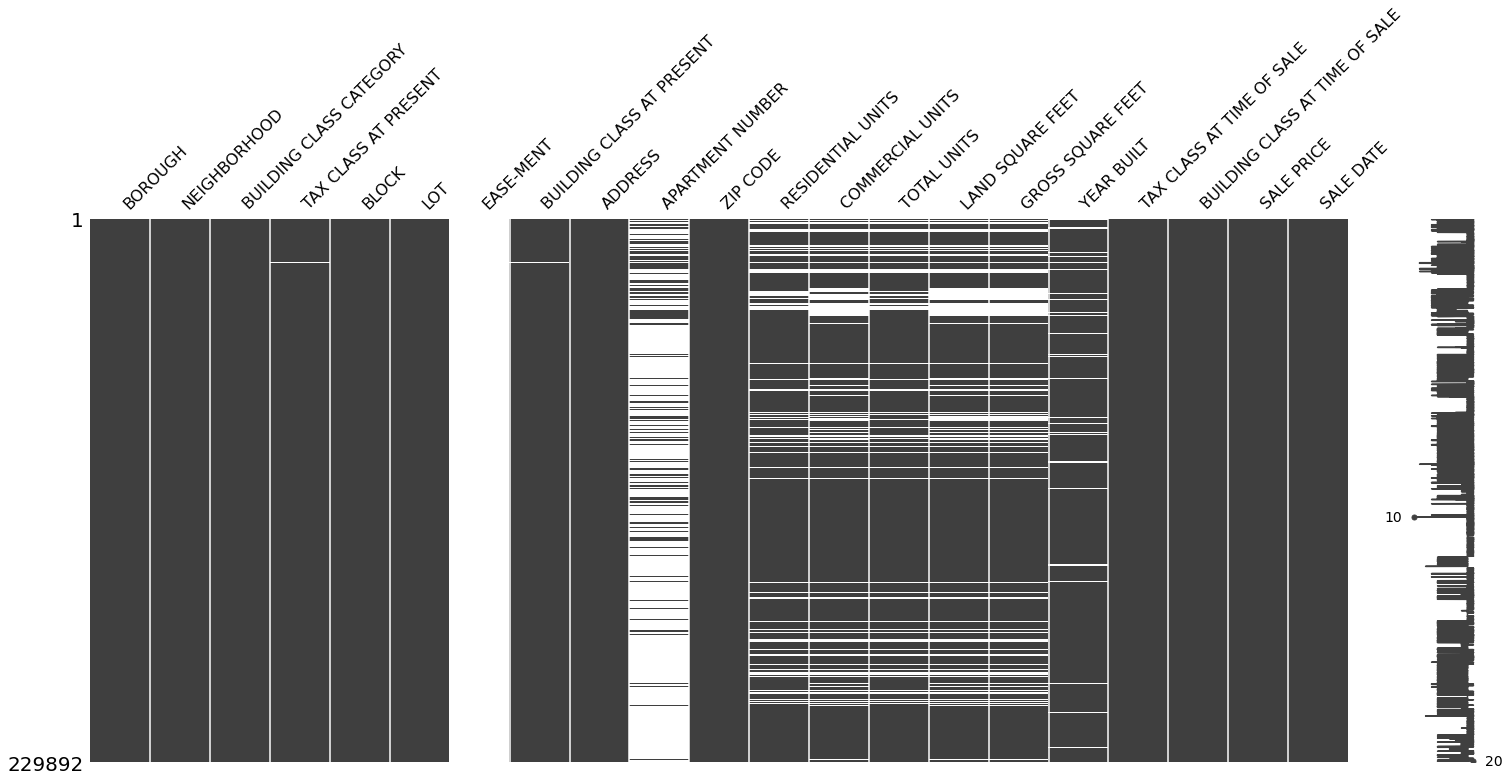

In [17]:
msno.matrix(data)

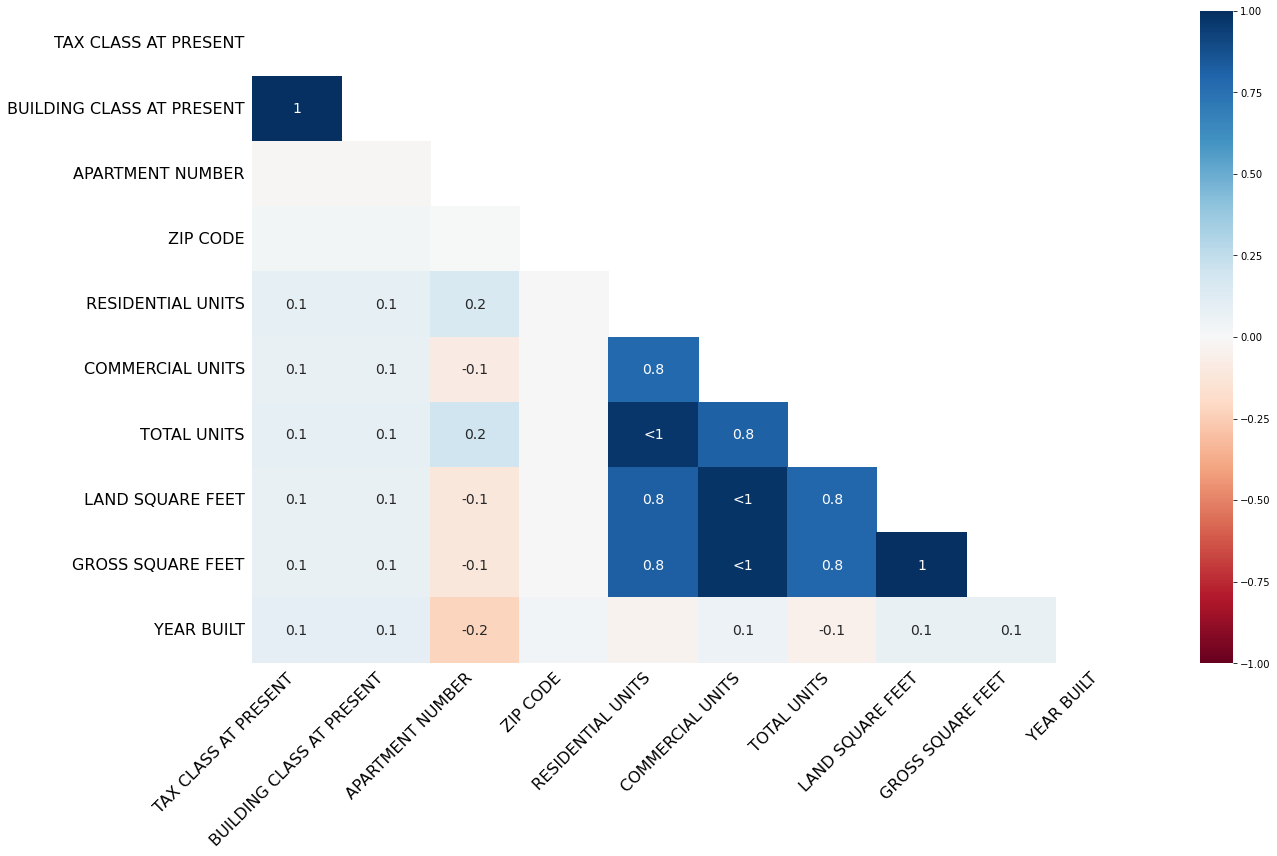

In [18]:
msno.heatmap(data)

### Depending on msno we need to drop (Easement and Apartment Number)

## Task 2
#### Data exploration using data visualization. Raise two questions that can be answered by performing data visualization. Briefely mention why you think this question would be interesting to whom (who is your audience). Think about the EDA principals.

### The question is too important for me, it will help me to select best features.

### Question 2.1
## Do the old builds with the same total units have higher price than new ones or not?

#### Data Exploration.

In [19]:
#check nulls percentage of each column
data.isnull().sum()* 100 / len(data)

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.118751
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.118751
ADDRESS                             0.000000
APARTMENT NUMBER                   77.981400
ZIP CODE                            0.007395
RESIDENTIAL UNITS                  13.431524
COMMERCIAL UNITS                   17.980182
TOTAL UNITS                        12.722931
LAND SQUARE FEET                   18.689211
GROSS SQUARE FEET                  18.688776
YEAR BUILT                          4.469490
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                          0.000000
SALE DATE                           0.000000
dtype: float64

In [20]:
#drop columns that contain very high missing data percentage
data.drop(columns=['EASE-MENT','APARTMENT NUMBER'],inplace=True)

In [21]:
#check nulls percentage of each column
data.isnull().sum()* 100 / len(data)

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.118751
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.118751
ADDRESS                            0.000000
ZIP CODE                           0.007395
RESIDENTIAL UNITS                 13.431524
COMMERCIAL UNITS                  17.980182
TOTAL UNITS                       12.722931
LAND SQUARE FEET                  18.689211
GROSS SQUARE FEET                 18.688776
YEAR BUILT                         4.469490
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                         0.000000
SALE DATE                          0.000000
dtype: float64

In [22]:
#check type of each column
data.dtypes

BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

#### Firstly we need to explore and handle sale price

In [23]:
# TODO write code to answer Q2.1
#check nulls in sale price column
np.count_nonzero(data['SALE PRICE'].isna())

0

In [24]:
#check value counts on sale price
data['SALE PRICE'].value_counts()

0             47024
$0            16912
$0             8067
10             1537
650,000         775
              ...  
$2,823,000        1
$2,554,000        1
$431,075          1
$99,839           1
$751,174          1
Name: SALE PRICE, Length: 24205, dtype: int64

In [25]:
#remove , and $ from sale price data
data['SALE PRICE'] = data['SALE PRICE'].str.translate(str.maketrans({',':''}))
data['SALE PRICE'] = data['SALE PRICE'].str.translate(str.maketrans({'$':''}))

In [26]:
#convert to numeric
data['SALE PRICE']=pd.to_numeric(data['SALE PRICE'])

In [27]:
#check the ratio of missing data after cleaning
total_miss=data['SALE PRICE'].isnull().sum()
percent_miss = (total_miss/data['SALE PRICE'].isnull().count()*100) 
missing_data = {'Total missing':total_miss,'% missing':percent_miss}
missing_data

{'% missing': 0.0, 'Total missing': 0}

In [28]:
data['SALE PRICE'].value_counts()

0         72003
10         2297
650000     1219
550000     1150
600000     1139
          ...  
407791        1
388298        1
671247        1
5614          1
751174        1
Name: SALE PRICE, Length: 18959, dtype: int64

In [29]:
#check unique values
data['SALE PRICE'].unique()

array([1200000,  520000,       0, ...,  544309,  273800,  751174])

#### Secondly we need to handle number of units.

In [30]:
#check nulls count in total units column
np.count_nonzero(data['TOTAL UNITS'].isna())

29249

In [31]:
#check nulls count in commercial units column
np.count_nonzero(data['COMMERCIAL UNITS'].isna())

41335

In [32]:
#check nulls count in residential units column
np.count_nonzero(data['RESIDENTIAL UNITS'].isna())

30878

In [33]:
#check count of each value
data['TOTAL UNITS'].value_counts()

1.0      77667
2.0      33228
1        27328
0.0      13115
2        11695
         ...  
355.0        1
489.0        1
250.0        1
506.0        1
222.0        1
Name: TOTAL UNITS, Length: 389, dtype: int64

In [34]:
#check count od each value
data['RESIDENTIAL UNITS'].value_counts()

1.0      71785
2.0      33569
1        24761
0.0      20428
0        12451
         ...  
249.0        1
116.0        1
113          1
188          1
165.0        1
Name: RESIDENTIAL UNITS, Length: 359, dtype: int64

In [35]:
#check unique values
data['RESIDENTIAL UNITS'].unique()

array([nan, 1.0, 6.0, 0.0, 26.0, 312.0, 33.0, 10.0, 8.0, 18.0, 20.0, 49.0,
       27.0, 4.0, 7.0, 2.0, 3.0, 9.0, 24.0, 5.0, 16.0, 17.0, 116.0, 31.0,
       12.0, 13.0, 22.0, 28.0, 55.0, 32.0, 48.0, 38.0, 69.0, 44.0, 51.0,
       56.0, 35.0, 30.0, 25.0, 92.0, 21.0, 54.0, 50.0, 72.0, 63.0, 53.0,
       58.0, 78.0, 36.0, 57.0, 14.0, 15.0, 83.0, 430.0, 11.0, 39.0, 59.0,
       46.0, 127.0, 180.0, 19.0, 23.0, 90.0, 209.0, 43.0, 134.0, 29.0,
       135.0, 84.0, 40.0, 37.0, 100.0, 67.0, 95.0, 45.0, 110.0, 375.0,
       418.0, 597.0, 102.0, 81.0, 140.0, 320.0, 79.0, 221.0, 133.0, 323.0,
       261.0, 62.0, 600.0, 68.0, 34.0, 341.0, 60.0, 155.0, 108.0, 105.0,
       41.0, 61.0, 266.0, 151.0, 74.0, 285.0, 145.0, 147.0, 122.0, 283.0,
       124.0, 169.0, 142.0, 184.0, 278.0, 233.0, 70.0, 42.0, 91.0, 446.0,
       503.0, 489.0, 196.0, 65.0, 75.0, 182.0, 52.0, 66.0, 119.0, 295.0,
       190.0, 156.0, '1', '0', '217', '24', '9', '10', '13', '15', '8',
       '16', '22', '2', '490', '20', '18', '17',

In [36]:
#convert residential and commercial units to string
data['RESIDENTIAL UNITS']= data['RESIDENTIAL UNITS'].astype(str)
data['COMMERCIAL UNITS']= data['COMMERCIAL UNITS'].astype(str)

We need to replace nulls in RESIDENTIAL UNITS and COMMERCIAL UNITS with 0 value.

In [37]:
#remove , from specific column
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].str.translate(str.maketrans({',':''}))
data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].str.translate(str.maketrans({',':''}))

In [38]:
#check unique values
data['RESIDENTIAL UNITS'].unique()

array(['nan', '1.0', '6.0', '0.0', '26.0', '312.0', '33.0', '10.0', '8.0',
       '18.0', '20.0', '49.0', '27.0', '4.0', '7.0', '2.0', '3.0', '9.0',
       '24.0', '5.0', '16.0', '17.0', '116.0', '31.0', '12.0', '13.0',
       '22.0', '28.0', '55.0', '32.0', '48.0', '38.0', '69.0', '44.0',
       '51.0', '56.0', '35.0', '30.0', '25.0', '92.0', '21.0', '54.0',
       '50.0', '72.0', '63.0', '53.0', '58.0', '78.0', '36.0', '57.0',
       '14.0', '15.0', '83.0', '430.0', '11.0', '39.0', '59.0', '46.0',
       '127.0', '180.0', '19.0', '23.0', '90.0', '209.0', '43.0', '134.0',
       '29.0', '135.0', '84.0', '40.0', '37.0', '100.0', '67.0', '95.0',
       '45.0', '110.0', '375.0', '418.0', '597.0', '102.0', '81.0',
       '140.0', '320.0', '79.0', '221.0', '133.0', '323.0', '261.0',
       '62.0', '600.0', '68.0', '34.0', '341.0', '60.0', '155.0', '108.0',
       '105.0', '41.0', '61.0', '266.0', '151.0', '74.0', '285.0',
       '145.0', '147.0', '122.0', '283.0', '124.0', '169.0', '142.0'

In [39]:
#fill nulls with 0 and convert to numeric
data['RESIDENTIAL UNITS'] = pd.to_numeric(data['RESIDENTIAL UNITS'], errors='coerce').fillna(0, downcast='infer')
data['COMMERCIAL UNITS'] = pd.to_numeric(data['COMMERCIAL UNITS'], errors='coerce').fillna(0, downcast='infer')

In [40]:
data['RESIDENTIAL UNITS'].value_counts()

1      96546
0      63757
2      45522
3      13245
4       3542
       ...  
129        1
137        1
305        1
215        1
165        1
Name: RESIDENTIAL UNITS, Length: 238, dtype: int64

In [41]:
#check nulls after cleaning
print(np.count_nonzero(data['RESIDENTIAL UNITS'].isna()))
print(np.count_nonzero(data['COMMERCIAL UNITS'].isna()))

0
0


In [42]:
data['COMMERCIAL UNITS'].unique()

array([   1,    0,    4,    2,  107,    9,    3,    6,    5,    7,    8,
        259,   60,  180,   11,  124,   20,  152,   15,  167,   42,   18,
         16,   44,   54,   35,   10,   13,   19,  150,   27,   33,   23,
         28,   14,  133,   29,   22,   47,   37,   26,   49,   12,   53,
        194,   30,   64,   41,  222,  114,   73,  104,   17,   74,  570,
        155,   61,   88,   83,   52,   85,   67,   24,   21,   58,   50,
         57,   43,   39,  138,   70,   48,  111,  116,  120,   56,   45,
        239,   25,   36,   95,   79,   40,   75,   94,   46,   71,  131,
        252,  530,  127,  210,   65,   32,   78,  174,  168, 1132,  842,
         63,  123,   72,   89])

In [43]:
data['RESIDENTIAL UNITS'].unique()

array([   0,    1,    6,   26,  312,   33,   10,    8,   18,   20,   49,
         27,    4,    7,    2,    3,    9,   24,    5,   16,   17,  116,
         31,   12,   13,   22,   28,   55,   32,   48,   38,   69,   44,
         51,   56,   35,   30,   25,   92,   21,   54,   50,   72,   63,
         53,   58,   78,   36,   57,   14,   15,   83,  430,   11,   39,
         59,   46,  127,  180,   19,   23,   90,  209,   43,  134,   29,
        135,   84,   40,   37,  100,   67,   95,   45,  110,  375,  418,
        597,  102,   81,  140,  320,   79,  221,  133,  323,  261,   62,
        600,   68,   34,  341,   60,  155,  108,  105,   41,   61,  266,
        151,   74,  285,  145,  147,  122,  283,  124,  169,  142,  184,
        278,  233,   70,   42,   91,  446,  503,  489,  196,   65,   75,
        182,   52,   66,  119,  295,  190,  156,  217,  490,  126,  115,
       8764,  120,  107,  404,  109,  179,  164,   96,  177,   97,  200,
        125,   47,   94,   87,  112,   64,   71,  1

Handle nulls in TOTAL UNITS by filling it by the sum of RESIDENTIAL UNITS and COMMERCIAL UNITS.

In [44]:
#fill total units nulls
data['TOTAL UNITS']=(data['RESIDENTIAL UNITS']+data['COMMERCIAL UNITS'])

In [45]:
data['TOTAL UNITS'].unique()

array([   1,    0,    7,    4,    2,  107,   26,  321,   37,   10,    8,
          6,    9,   20,   22,   23,   49,   27,    3,   24,    5,   12,
         18,  116,   31,   16,   13,   15,   28,   14,   55,   38,   50,
         43,   70,   62,   53,   59,   60,   41,   17,   30,   25,   97,
         21,   56,   57,   72,   66,   58,   78,   36,   87,   48,  430,
        259,   29,   11,   39,   51,  134,  181,   19,  180,   35,   33,
         90,  220,   47,   54,   42,  135,   84,   40,  100,   67,   95,
         44,   45,   34,  110,  124,  152,  167,  380,  422,  601,  120,
         83,  140,  339,   99,   82,  221,  150,  133,   32,  137,  329,
        262,   64,  611,   69,  344,  156,  108,  105,   52,  194,  273,
        151,  222,  114,   73,  104,   74,  570,  155,  211,  111,   75,
         61,   88,   85,  288,  145,  148,  286,  125,  212,  169,  147,
        185,  285,  234,  233,  235,   68,  271,   93,  452,  506,  489,
        127,  196,   65,  182,  295,  427,  201,  1

In [46]:
#check the ratio of missing data in TOTAL UNITS after cleaning
total_miss=data['TOTAL UNITS'].isnull().sum()
percent_miss = (total_miss/data['TOTAL UNITS'].isnull().count()*100) 
missing_data = {'Total missing':total_miss,'% missing':percent_miss}
missing_data

{'% missing': 0.0, 'Total missing': 0}

In [47]:
data['TOTAL UNITS'].value_counts()

1      105137
0       51495
2       44916
3       15406
4        4013
        ...  
98          1
307         1
222         1
570         1
212         1
Name: TOTAL UNITS, Length: 258, dtype: int64

We will use TOTAL UNITS value = 1 to compare between build year because it is most frequent one.

#### Then we need to explore and handle year build.

In [48]:
data['YEAR BUILT'].unique()

array([2003., 1964., 1963., 1965., 1962., 1924., 1975., 2006.,   nan,
       2014., 2008., 2013., 2004., 1925., 1952., 1977., 1920., 1928.,
       1930., 1931., 1910., 1926., 1900., 1929., 1908., 1914., 1905.,
       1916., 1911., 1912., 1921., 1890., 1940., 1923., 1915., 1913.,
       1927., 1950., 2007., 1899., 2018., 1903., 1906., 1901., 1942.,
       1917., 1936., 1948., 1922., 1909., 1971., 1918., 2005., 1985.,
       1987., 1988., 2009., 2015., 1983., 1939., 1970., 1932., 1979.,
       1989., 2017., 1907., 1951., 1941., 1935., 1954., 1968., 2012.,
       1955., 1937., 1938., 1986., 1966., 2016., 2011., 1875., 1945.,
       1902., 1990., 1973., 1956., 1960., 1957., 1961., 1996., 1991.,
       1984., 1999., 1959., 1958., 1967., 1978., 1980., 2019., 1981.,
       1947., 1969., 1982., 1974., 2002., 1998., 1953., 1869., 1880.,
          0., 1839., 1857., 1821., 1946., 2000., 1895., 1976., 1972.,
       1896., 1904., 2010., 1995., 2001., 1992., 1949., 1994., 1997.,
       1933., 1894.,

As we see Year Build have 0 value should be replaced with nulls to handel it after that.

In [49]:
#replace 0 with nulls to handle it with imputer at task 4
data['YEAR BUILT'].replace((0.), np.nan, inplace=True)
data['YEAR BUILT'].replace((0), np.nan, inplace=True)
data['YEAR BUILT'].replace(('0'), np.nan, inplace=True)

In [50]:
data['YEAR BUILT'].unique()

array([2003., 1964., 1963., 1965., 1962., 1924., 1975., 2006.,   nan,
       2014., 2008., 2013., 2004., 1925., 1952., 1977., 1920., 1928.,
       1930., 1931., 1910., 1926., 1900., 1929., 1908., 1914., 1905.,
       1916., 1911., 1912., 1921., 1890., 1940., 1923., 1915., 1913.,
       1927., 1950., 2007., 1899., 2018., 1903., 1906., 1901., 1942.,
       1917., 1936., 1948., 1922., 1909., 1971., 1918., 2005., 1985.,
       1987., 1988., 2009., 2015., 1983., 1939., 1970., 1932., 1979.,
       1989., 2017., 1907., 1951., 1941., 1935., 1954., 1968., 2012.,
       1955., 1937., 1938., 1986., 1966., 2016., 2011., 1875., 1945.,
       1902., 1990., 1973., 1956., 1960., 1957., 1961., 1996., 1991.,
       1984., 1999., 1959., 1958., 1967., 1978., 1980., 2019., 1981.,
       1947., 1969., 1982., 1974., 2002., 1998., 1953., 1869., 1880.,
       1839., 1857., 1821., 1946., 2000., 1895., 1976., 1972., 1896.,
       1904., 2010., 1995., 2001., 1992., 1949., 1994., 1997., 1933.,
       1894., 1892.,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



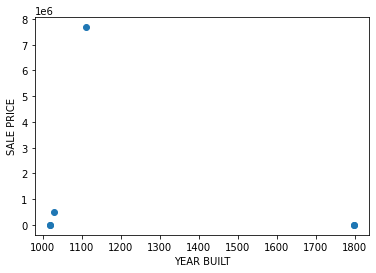

In [51]:
#check sale price of each year with total unit
sns.regplot(x='YEAR BUILT', y='SALE PRICE',
            data=data[data['YEAR BUILT']<1800][data['TOTAL UNITS']<=5],
            fit_reg=False, scatter_kws={'alpha':1})

As we see any year before 1800 categorized as outlier, so we can drop them after that.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



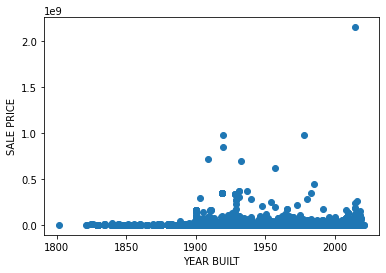

In [52]:
#check sale price at year build after 1800
sns.regplot(x='YEAR BUILT', y='SALE PRICE',
            data=data[data['YEAR BUILT']>1800][data['TOTAL UNITS']<=5],
            fit_reg=False, scatter_kws={'alpha':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



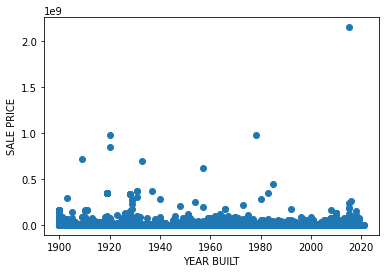

In [53]:
#check after 1900
sns.regplot(x='YEAR BUILT', y='SALE PRICE',
            data=data[data['YEAR BUILT']>=1900][data['TOTAL UNITS']<=5],
            fit_reg=False, scatter_kws={'alpha':1})

As we see the prices of 90s buildings is greater than 20s. But we can visualize each no. of units alone to make sure about that.

We will check for no. of units 1 because it the most frequent value.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



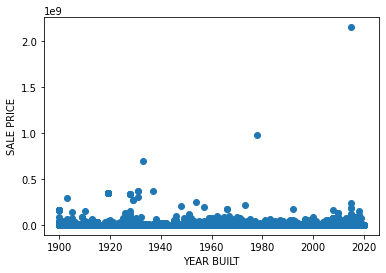

In [54]:
#check when the total unit only =1
sns.regplot(x='YEAR BUILT', y='SALE PRICE',
            data=data[data['YEAR BUILT']>=1900][data['TOTAL UNITS']==1],
            fit_reg=False, scatter_kws={'alpha':1})

As we see in previous result, 90s prices is greater than 20s, specially the range from 1920 till 1970 and the prices of 2015 too.

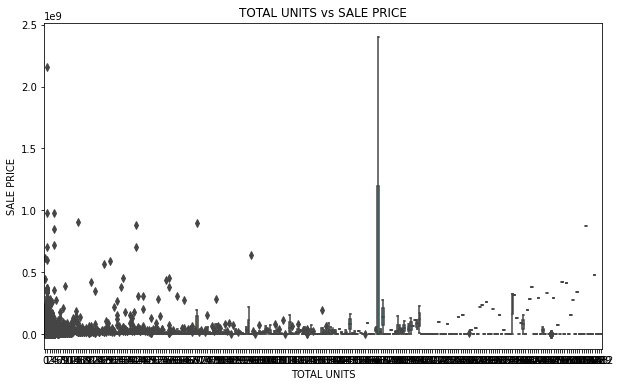

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data)
plt.title('TOTAL UNITS vs SALE PRICE')
plt.show()

### Answer to Question 1
## Yes, old buildings have higher price than new ones with the same total units.

### Question 2.2
## Does zip code indicate to the same Neighborhood?

#### Handeling values of borough column.

In [56]:
# TODO write code to answer Q2.2
data['BOROUGH'].value_counts()

4.0    73002
3.0    65168
1.0    46411
5.0    23196
2.0    22115
Name: BOROUGH, dtype: int64

In [57]:
data['BOROUGH'] = data['BOROUGH'].replace(1.0, "Manhattan")
data['BOROUGH'] = data['BOROUGH'].replace(2.0, "Bronx")
data['BOROUGH'] = data['BOROUGH'].replace(3.0, "Brooklyn")
data['BOROUGH'] = data['BOROUGH'].replace(4.0, "Queens")
data['BOROUGH'] = data['BOROUGH'].replace(5.0, "Staten Island")

In [58]:
data['BOROUGH'] = data['BOROUGH'].astype(str)
data['BOROUGH']=data['BOROUGH'].astype('category')

In [59]:
data['BOROUGH'].value_counts()

Queens           73002
Brooklyn         65168
Manhattan        46411
Staten Island    23196
Bronx            22115
Name: BOROUGH, dtype: int64

#### Now we will handle zip code values

In [60]:
#describe the data
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,229892.000000,229892.000000,229875.000000,229892.000000,229892.000000,229892.000000,213172.000000,229892.000000,2.298920e+05
mean,4424.852861,357.706684,10844.786445,1.986942,0.259117,2.246059,1950.440851,1.618482,1.298717e+06
std,3656.221967,653.410115,724.762975,22.997156,5.709623,23.797351,34.727294,0.801129,1.220568e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1018.000000,1.000000,0.000000e+00
25%,1367.000000,22.000000,10307.000000,0.000000,0.000000,1.000000,1925.000000,1.000000,0.000000e+00
50%,3565.000000,49.000000,11210.000000,1.000000,0.000000,1.000000,1945.000000,1.000000,4.500000e+05
75%,6579.000000,318.000000,11358.000000,2.000000,0.000000,2.000000,1970.000000,2.000000,8.600000e+05
max,16350.000000,9116.000000,11697.000000,8764.000000,1132.000000,8812.000000,2021.000000,4.000000,2.397502e+09


Zip Code contains 0 values should be replaced with nulls to handle it.

In [61]:
#replace 0 with nulls
data['ZIP CODE']= data['ZIP CODE'].replace(0.,np.nan)

In [62]:
#check nulls percentage of each column
data.isnull().sum()* 100 / len(data)

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.118751
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.118751
ADDRESS                            0.000000
ZIP CODE                           0.189654
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  18.689211
GROSS SQUARE FEET                 18.688776
YEAR BUILT                         7.272980
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                         0.000000
SALE DATE                          0.000000
dtype: float64

We can drop Nulls from columns TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT and ZIP CODE


In [63]:
#drop useless columns
data=data.dropna(subset=['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE'])

In [64]:
data['ZIP CODE'].unique()

array([10033., 10023., 10024., 10069., 10025., 10019., 10032., 10030.,
       10040., 10022., 10065., 10021., 10075., 10028., 10128., 10029.,
       10011., 10014., 10003., 10012., 10027., 10026., 10031., 10035.,
       10037., 10010., 10016., 10018., 10001., 10034., 10463., 10039.,
       10013., 10002., 10038., 10007., 10036., 10009., 10005., 10006.,
       10004., 10044., 10105., 10020., 10280., 10282., 10017., 10171.,
       10167., 10169., 10177., 10179., 10170., 10172., 10468., 10456.,
       10451., 10452., 10454., 10462., 10471., 10461., 10455., 10453.,
       10474., 10457., 10458., 10460., 10459., 10467., 10469., 10466.,
       10475., 10465., 10472., 10473., 10464., 10470., 11211., 11249.,
       11220., 11232., 11215., 11231., 11218., 11237., 11206., 11222.,
       11205., 11219., 11204., 11230., 11217., 11201., 11234., 11214.,
       11212., 11221., 11207., 11235., 11223., 11209., 11228., 11233.,
       11213., 11216., 11238., 11224., 11229., 11239., 11208., 11210.,
      

In [65]:
data['ZIP CODE'].value_counts()

10314.0    4091
10023.0    3352
10312.0    3339
11234.0    3325
11235.0    3260
           ... 
10171.0       1
10167.0       1
10169.0       1
10177.0       1
11227.0       1
Name: ZIP CODE, Length: 193, dtype: int64

#### We'll visualize our data to answer the question.

In [66]:
data['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              6974
UPPER EAST SIDE (59-79)     4644
UPPER WEST SIDE (59-79)     4135
UPPER EAST SIDE (79-96)     4054
BEDFORD STUYVESANT          3855
                            ... 
BRONX PARK                    13
BLOOMFIELD                    12
CITY ISLAND-PELHAM STRIP       6
FRESH KILLS                    3
AIRPORT JFK                    1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

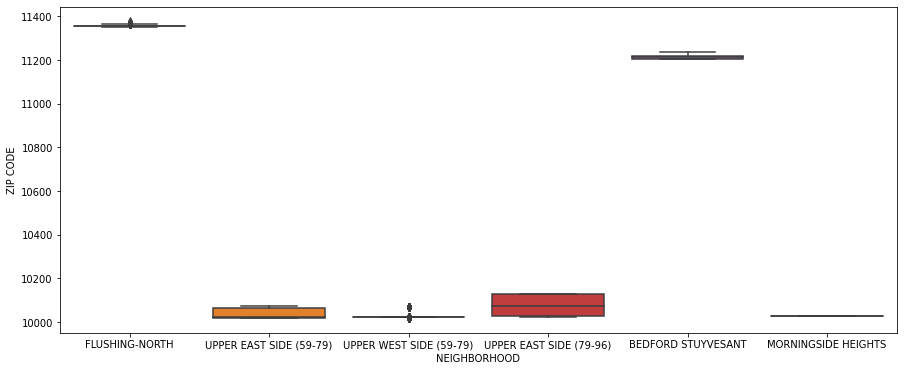

In [67]:
#visualize specific parts of data
plt.figure(figsize=(15,6))
sns.boxplot(x='NEIGHBORHOOD', y="ZIP CODE", data=pd.concat([data[data['NEIGHBORHOOD']=='FLUSHING-NORTH'],
                                                            data[data['NEIGHBORHOOD']=='UPPER EAST SIDE (59-79)'],
                                                            data[data['NEIGHBORHOOD']=='UPPER WEST SIDE (59-79)'],
                                                            data[data['NEIGHBORHOOD']=='UPPER EAST SIDE (79-96)'],
                                                            data[data['NEIGHBORHOOD']=='BEDFORD STUYVESANT'],
                                                            data[data['NEIGHBORHOOD']=='MORNINGSIDE HEIGHTS']
                                                            ],axis=0))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

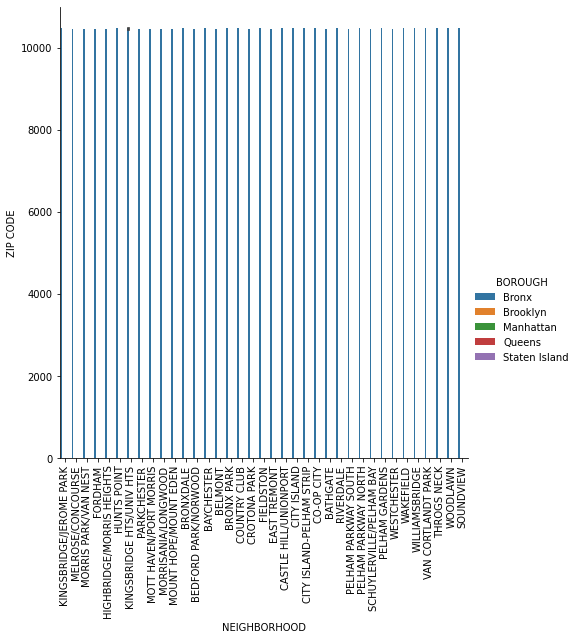

In [68]:
sns.catplot(x="NEIGHBORHOOD", y="ZIP CODE", hue="BOROUGH", kind="bar",height=7, 
            data=data[data['BOROUGH']=='Bronx'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

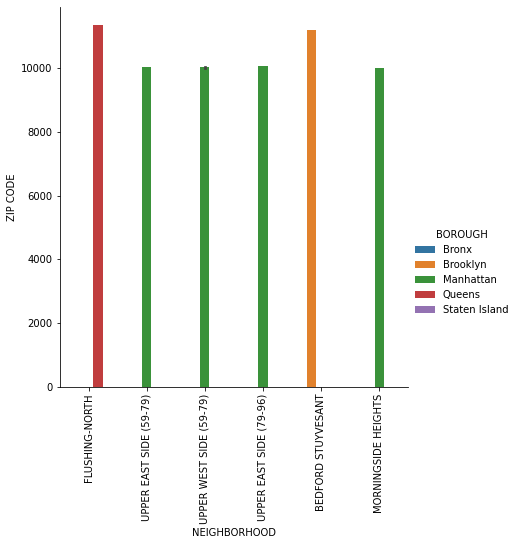

In [69]:
sns.catplot(x="NEIGHBORHOOD", y="ZIP CODE", hue="BOROUGH",height=6, kind="bar", data=pd.concat([data[data['NEIGHBORHOOD']=='FLUSHING-NORTH'],
                                                                                                data[data['NEIGHBORHOOD']=='UPPER EAST SIDE (59-79)'],
                                                                                                data[data['NEIGHBORHOOD']=='UPPER WEST SIDE (59-79)'],
                                                                                                data[data['NEIGHBORHOOD']=='UPPER EAST SIDE (79-96)'],
                                                                                                data[data['NEIGHBORHOOD']=='BEDFORD STUYVESANT'],
                                                                                                data[data['NEIGHBORHOOD']=='MORNINGSIDE HEIGHTS']
                                                                                                ],axis=0))
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



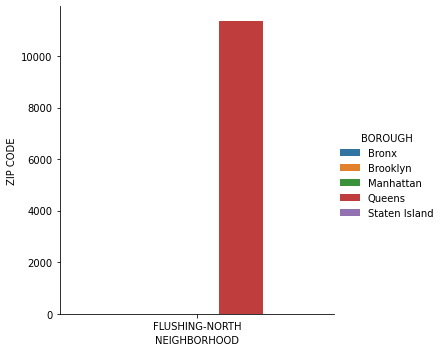

In [70]:
sns.catplot(x="NEIGHBORHOOD", y="ZIP CODE", hue="BOROUGH", kind="bar",height=5, 
            data=data[data['BOROUGH']=='Queens'][data['NEIGHBORHOOD']=='FLUSHING-NORTH'])

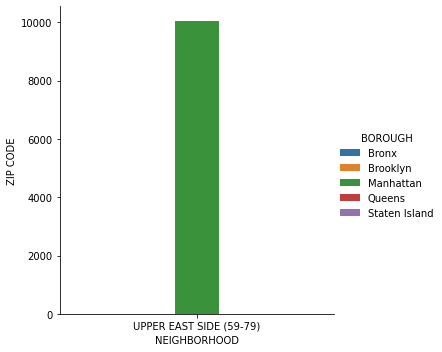

In [71]:
sns.catplot(x="NEIGHBORHOOD", y="ZIP CODE", hue="BOROUGH", kind="bar",height=5, data=data[data['NEIGHBORHOOD']=='UPPER EAST SIDE (59-79)'])

### Answer to Question 2
## The Neighborhood at specific borough contains the same zipcode.

### Exploring data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



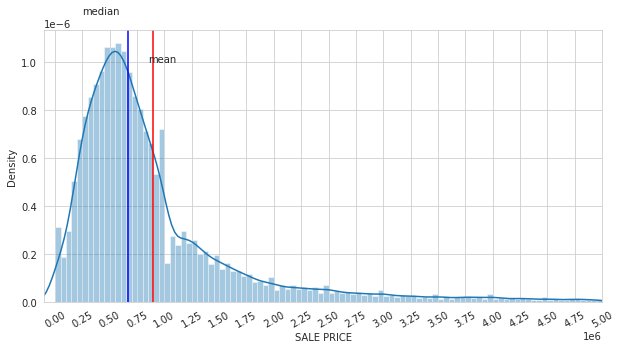

In [72]:
# house prices greater than 5 mln probably represents outliers.
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plotd = sns.distplot(data[(data['SALE PRICE']>100) & (data['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(data[(data['SALE PRICE']>100) & (data['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(data[(data['SALE PRICE']>100) & (data['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

<Figure size 864x360 with 0 Axes>

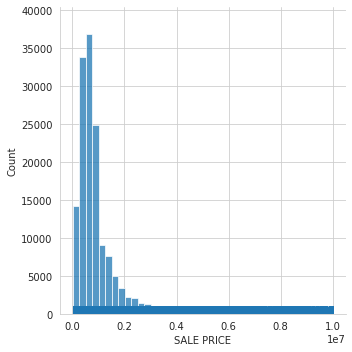

In [73]:
df = data[(data['SALE PRICE'] > 10000) & (data['SALE PRICE'] < 10000000)]

plt.figure(figsize=(12,5))
sns.displot(df['SALE PRICE'], bins=40, rug=True)
plt.show()

## Task 3
#### Data Exploration via Statistical Test Raise one question that can be answered by performing hypothesis test. Briefely mention why you think this question would be interesting to whom (who is your audience). Also mention which statistical test you would choose and why.

### Null hypothesis: {BUILDING CLASS has the same sale price at sale and at present}

### Alternative hypothesis: {BUILDING CLASS doesn't have the same sale price at sale and at present}

In [74]:
# TODO write code to perform task 3
#check value counts in this column
data['BUILDING CLASS AT PRESENT'].value_counts()

D4    34197
R4    32144
A1    20249
A5    16595
B2    13924
      ...  
P4        1
H5        1
Z4        1
Y3        1
V7        1
Name: BUILDING CLASS AT PRESENT, Length: 179, dtype: int64

In [75]:
#check value counts
data['BUILDING CLASS AT TIME OF SALE'].value_counts()

D4      21845
R4      20204
A1      13094
 D4     12352
 R4     11677
        ...  
 F8         1
 H5         1
Z4          1
L2          1
 T2         1
Name: BUILDING CLASS AT TIME OF SALE, Length: 330, dtype: int64

In [76]:
#convert features to category
data['BUILDING CLASS AT TIME OF SALE']=data['BUILDING CLASS AT TIME OF SALE'].astype('category')
data['BUILDING CLASS AT PRESENT']=data['BUILDING CLASS AT PRESENT'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
#check null hypothies with statistics
from scipy import stats
sale = data[data['BUILDING CLASS AT TIME OF SALE'] == 'D4']['SALE PRICE']
present = data[data['BUILDING CLASS AT PRESENT'] == 'D4']['SALE PRICE']
stats.ttest_ind(sale, present)

Ttest_indResult(statistic=4.4639253703624435, pvalue=8.062831700399736e-06)

## pvalue < 0.05, it means Alternative hypothies is right.

## Task 4
#### Feature Engineering. If we would like to predict the house sale price. Analyze the scale of each attribute and determine which ones you would transfer (e.g., cateogorical features). Discuss how you plan to select important features.

* We can drop Neighborhood column and Address because we have zipcode which refers to location.
* Convert date to month and year.
* Drop building class category because it's the same with building calss at present.

In [78]:
# TODO for Task 4
# 'SALE DATE' can be split into month and year

data['SALE DATE']= pd.to_datetime(data['SALE DATE'], errors='coerce')
data['SALE MONTH'] = pd.DatetimeIndex(data['SALE DATE']).month.astype("category")
data['SALE YEAR'] = pd.DatetimeIndex(data['SALE DATE']).year.astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [79]:
data=data.drop(columns=['ADDRESS','NEIGHBORHOOD','SALE DATE','BUILDING CLASS CATEGORY'])

In [80]:
data['LAND SQUARE FEET'].value_counts()

0         45818
2,000     10852
2,500      9742
4,000      8927
3,000      3653
          ...  
4,931         1
479           1
11,149        1
32,293        1
4,402         1
Name: LAND SQUARE FEET, Length: 9986, dtype: int64

In [81]:
data['LAND SQUARE FEET'].unique()

array([nan, '0', '1,839', ..., '8,769', '9,831', '4,402'], dtype=object)

In [82]:
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].str.translate(str.maketrans({',':''}))
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].str.translate(str.maketrans({',':''}))

In [83]:
data['LAND SQUARE FEET'].unique()

array([nan, '0', '1839', ..., '8769', '9831', '4402'], dtype=object)

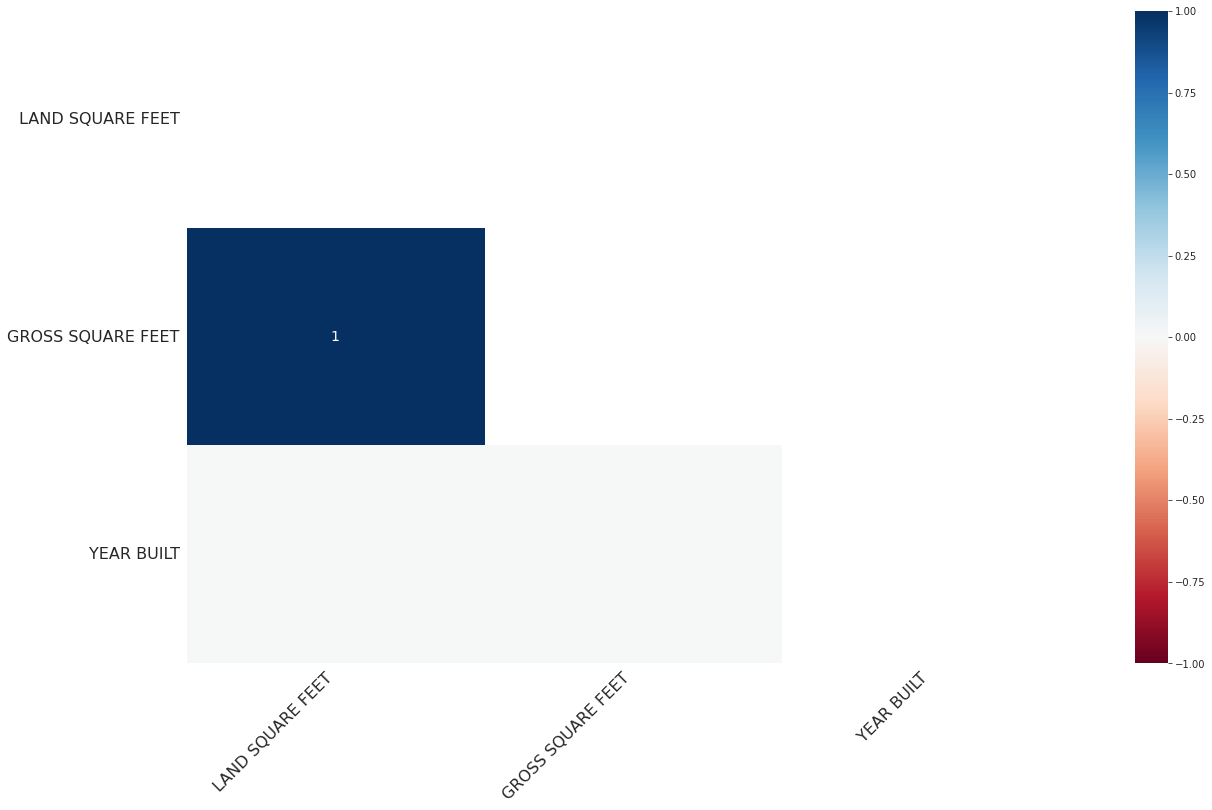

In [84]:
msno.heatmap(data)

As we see, land square feet and gross square feet are highly corelated missing.


In [85]:
data.isnull().sum()* 100 / len(data)

BOROUGH                            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  18.627746
GROSS SQUARE FEET                 18.627310
YEAR BUILT                         7.045836
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                         0.000000
SALE MONTH                         0.000000
SALE YEAR                          0.000000
dtype: float64

In [86]:
#REPLACE 0 OF SALE PRICE WITH NULLS TO FILL IT BY IMPUTER
data['SALE PRICE'].replace((0), np.nan, inplace=True)

In [87]:
#fill nulls
from sklearn.impute import KNNImputer
imputed = ['LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
imputer = KNNImputer(n_neighbors=2)
data[imputed] = imputer.fit_transform(data[imputed])

In [88]:
#check nulls
data.isnull().sum()* 100 / len(data)

BOROUGH                           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
BUILDING CLASS AT PRESENT         0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE MONTH                        0.0
SALE YEAR                         0.0
dtype: float64

In [89]:
#encode categorical data
from sklearn.preprocessing import LabelEncoder
data['BOROUGH'] = LabelEncoder().fit_transform(data['BOROUGH'])
data['BUILDING CLASS AT PRESENT'] = LabelEncoder().fit_transform(data['BUILDING CLASS AT PRESENT'])
data['BUILDING CLASS AT TIME OF SALE'] = LabelEncoder().fit_transform(data['BUILDING CLASS AT TIME OF SALE'])
data['TAX CLASS AT PRESENT'] = LabelEncoder().fit_transform(data['TAX CLASS AT PRESENT'])
data['TAX CLASS AT TIME OF SALE'] = LabelEncoder().fit_transform(data['TAX CLASS AT TIME OF SALE'])

In [90]:
#display data after encoding
data

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,SALE YEAR
0,2,9,2180.0,1230.0,138,10033.0,0,1,1,0.0,0.0,2003.0,2,291,1200000.0,12,2020
1,2,5,1158.0,1310.0,135,10023.0,0,0,0,10020.0,92323.0,1964.0,1,288,520000.0,1,2019
2,2,5,1158.0,1310.0,135,10023.0,0,0,0,0.0,0.0,1964.0,1,288,490000.0,7,2019
3,2,5,1158.0,1310.0,135,10023.0,0,0,0,10020.0,92323.0,1964.0,1,288,460000.0,11,2019
4,2,5,1158.0,1310.0,135,10023.0,0,0,0,10020.0,92323.0,1964.0,1,288,429000.0,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230654,4,0,2377.0,58.0,13,10314.0,2,0,2,2350.0,1312.0,1980.0,0,171,517500.0,5,2020
230655,4,0,2374.0,52.0,11,10314.0,2,0,2,3675.0,2200.0,1994.0,0,169,775000.0,11,2020
230656,4,0,2374.0,49.0,13,10314.0,2,0,2,3675.0,1600.0,1994.0,0,171,740000.0,7,2020
230657,4,0,2388.0,33.0,13,10314.0,2,0,2,2200.0,1778.0,1982.0,0,171,645000.0,8,2020


In [91]:
#convert some of features to category
categ = ['BOROUGH','LOT','BLOCK']
for col in categ:
    data[col] = data[col].astype('category')

In [92]:
#check type of each column
data.dtypes

BOROUGH                           category
TAX CLASS AT PRESENT                 int64
BLOCK                             category
LOT                               category
BUILDING CLASS AT PRESENT            int64
ZIP CODE                           float64
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
TOTAL UNITS                          int64
LAND SQUARE FEET                   float64
GROSS SQUARE FEET                  float64
YEAR BUILT                         float64
TAX CLASS AT TIME OF SALE            int64
BUILDING CLASS AT TIME OF SALE       int64
SALE PRICE                         float64
SALE MONTH                        category
SALE YEAR                         category
dtype: object

In [93]:
#split data and label
x=data.drop(columns=['SALE PRICE'])
y = data.iloc[:,-1].values.reshape(-1,1)

In [94]:
#check shapes
y.shape,x.shape

((229185, 1), (229185, 16))

In [95]:
from sklearn.preprocessing import StandardScaler
#rescale train data to be simpler
sc = StandardScaler()
x= sc.fit_transform(x)
# y_= sc.fit_transform(y)

## Task 5: AutoML

#### Using Auto-sklearn to explore performance of one state-of-the-art autoML tool on the given data (after your previous preprocessing). Optional: compare with performing autosklearn on raw data.
#### ref. https://automl.github.io/auto-sklearn/master/examples/20_basic/example_regression.html

In [96]:
# TODO for Task 5
#split data to train and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y,test_size=0.2, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py:179: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [97]:
#use automl regression model
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
)
automl.fit(X_train, y_train, dataset_name='diabetes')
print(automl.leaderboard())

          rank  ensemble_weight         type          cost   duration
model_id                                                             
3            1              1.0  extra_trees  8.487289e-07  21.900834


In [98]:
#predict train and test data then calculate r2 score/ mae
train_predictions = automl.predict(X_train)
automl.score(X_train,y_train)
automl.score(X_test,y_test)

print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print("Test MAE:", mean_absolute_error(y_test, test_predictions))

Train R2 score: 0.9999992888968955
Test R2 score: 0.9999983851743507
Test MAE: 7.695463278869821e-05
